El objetivo es entender el funcionamiento de la tecnología en el pais, sobre todo banda ancha (velocidades de descarga de al menos 768 Kbps y velocidades de carga de al menos 200 Kbps), para así poder hacer recomendacion a una empresa que ingresará al pais.

#### El trabajo básico e inicial a realizar es:
 
#### Búsqueda de valores faltantes
#### Valores atípicos/extremos u outliers 
#### Registros duplicados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
#import warnings

In [2]:
df = pd.read_excel("./Internet.xlsx")

El excel tiene varias hojas

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Columns: 125 entries, Provincia to 10000 Mbps
dtypes: float64(121), object(4)
memory usage: 2.9+ MB


In [4]:
df.head()  #Esto corresponde a la hoja Acc_vel_loc_sinrangos 

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,2.0,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


primero importé las hojas/tablas completas y las separaré en dataframes:

In [3]:
hojas = pd.read_excel("./Internet.xlsx", sheet_name=None)

for nombre_hoja, df in hojas.items():
    print(f"Hoja: {nombre_hoja}")
    print(df.head(1))
    print()

Hoja: Acc_vel_loc_sinrangos
      Provincia     Partido   Localidad Link Indec  Otros  0,256 Mbps  \
0  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100    NaN         NaN   

   0,5 Mbps  0,512 Mbps  0,75 Mbps  1 Mbps  ...  680 Mbps  700 Mbps  800 Mbps  \
0       2.0         NaN       19.0     NaN  ...       NaN       NaN       NaN   

   850 Mbps  900 Mbps  999 Mbps  1000 Mbps  1024 Mbps  4000 Mbps  10000 Mbps  
0       NaN       NaN       NaN        NaN        NaN        NaN         NaN  

[1 rows x 125 columns]

Hoja: Velocidad_sin_Rangos
      Año  Trimestre     Provincia     Otros  0,256 Mbps  0,375 Mbps  \
0  2024.0        1.0  Buenos Aires  125147.0        18.0         0.0   

   0,625 Mbps  0,5 Mbps  0,512 Mbps  0,75 Mbps  ...  2048 Mbps  2529 Mbps  \
0         0.0   25815.0       169.0     4611.0  ...        0.0        0.0   

   3072 Mbps  4000 Mbps  5000 Mbps  5125 Mbps  6000 Mbps  7000 Mbps  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   8000 M

Veo las hojas:

In [4]:
for nombre_hoja, df in hojas.items():
    print(f"Hoja: {nombre_hoja}")

Hoja: Acc_vel_loc_sinrangos
Hoja: Velocidad_sin_Rangos
Hoja: Accesos_tecnologia_localidad
Hoja: Velocidad % por prov
Hoja: Totales VMD
Hoja: Totales Accesos Por Tecnología
Hoja: Accesos Por Tecnología
Hoja: Penetración-poblacion
Hoja: Penetracion-hogares
Hoja: Penetracion-totales
Hoja: Totales Accesos por velocidad
Hoja: Accesos por velocidad
Hoja: Dial-BAf
Hoja: Totales Dial-BAf
Hoja: Ingresos 


para acceder a Ingresos, por ejemplo:

In [5]:
Hoja_ingresos = 'Ingresos ' #aqui hay un espacio al final de ingresos que me trajo problemas
df_Ingresos = hojas[Hoja_ingresos]

print(f"DataFrame de la hoja '{Hoja_ingresos}':")
print(df_Ingresos.head())


DataFrame de la hoja 'Ingresos ':
    Año  Trimestre  Ingresos (miles de pesos)        Periodo
0  2024          1               2.804191e+08   Ene-Mar 2024
1  2023          4               1.673760e+08   Oct-Dic 2023
2  2023          3               1.331066e+08  Jul-Sept 2023
3  2023          2               1.180603e+08   Jun-Mar 2023
4  2033          1               1.041350e+08   Ene-Mar 2023


Voy a eliminar los espacios al inicio y al final de los nombres de las hojas

In [6]:
hojas_sin_espacios = {nombre_hoja.strip(): df for nombre_hoja, df in hojas.items()}
print("Nombres de las hojas en el archivo Excel (sin espacios):")
for nombre_hoja in hojas_sin_espacios.keys():
    print(f"'{nombre_hoja}'")

Nombres de las hojas en el archivo Excel (sin espacios):
'Acc_vel_loc_sinrangos'
'Velocidad_sin_Rangos'
'Accesos_tecnologia_localidad'
'Velocidad % por prov'
'Totales VMD'
'Totales Accesos Por Tecnología'
'Accesos Por Tecnología'
'Penetración-poblacion'
'Penetracion-hogares'
'Penetracion-totales'
'Totales Accesos por velocidad'
'Accesos por velocidad'
'Dial-BAf'
'Totales Dial-BAf'
'Ingresos'


In [7]:
hojas=hojas_sin_espacios

Ahora sí pruebo generar un df con una hoja particular

In [8]:
df_Ingresos = hojas['Ingresos']
print(df_Ingresos.head())

    Año  Trimestre  Ingresos (miles de pesos)        Periodo
0  2024          1               2.804191e+08   Ene-Mar 2024
1  2023          4               1.673760e+08   Oct-Dic 2023
2  2023          3               1.331066e+08  Jul-Sept 2023
3  2023          2               1.180603e+08   Jun-Mar 2023
4  2033          1               1.041350e+08   Ene-Mar 2023


la columna "Ingresos (en miles de pesos)" tiene un formato que no conviene para la lectura. Volveré a esto luego de tener todos mis dfs por cada página.

In [9]:
Hojas_lista = [
'Acc_vel_loc_sinrangos',
'Velocidad_sin_Rangos',
'Accesos_tecnologia_localidad',
'Velocidad % por prov',
'Totales VMD',
'Totales Accesos Por Tecnología',
'Accesos Por Tecnología',
'Penetración-poblacion',
'Penetracion-hogares',
'Penetracion-totales',
'Totales Accesos por velocidad',
'Accesos por velocidad',
'Dial-BAf',
'Totales Dial-BAf',
'Ingresos']

In [10]:
df_Acc_vel_loc_sinrangos = hojas['Acc_vel_loc_sinrangos']
df_Velocidad_sin_Rangos = hojas["Velocidad_sin_Rangos"]
df_Accesos_tecnologia_localidad = hojas['Accesos_tecnologia_localidad']
df_Velocidad_por_prov = hojas['Velocidad % por prov']
df_Totales_VMD = hojas['Totales VMD']
df_Totales_Accesos_Por_Tecnología = hojas['Totales Accesos Por Tecnología']
df_Accesos_Por_Tecnología = hojas['Accesos Por Tecnología']
df_Penetración_poblacion = hojas['Penetración-poblacion']
df_Penetracion_hogares = hojas['Penetracion-hogares']
df_Penetracion_totales = hojas['Penetracion-totales']
df_Totales_Accesos_por_velocidad= hojas['Totales Accesos por velocidad']
df_Accesos_por_velocidad = hojas['Accesos por velocidad']
df_Dial_BAf = hojas['Dial-BAf']
df_Totales_Dial_BAf = hojas['Totales Dial-BAf']
#df_Ingresos ya lo hice


En los que no hay datos, se puso "-", pero en acceso_vel_loc_sinrangos tiene NAN (pq no se pusieron datos), serìa util hacer los NAN = 0

In [14]:
df_Acc_vel_loc_sinrangos.head(5)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,2.0,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_Acc_vel_loc_sinrangos.fillna(0, inplace=True)

Confirmo que las otras dos que usan el "-" cuando no hay datos, estè cargado como 0 en su lugar:

In [12]:
df_Velocidad_sin_Rangos.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2024.0,1.0,Buenos Aires,125147.0,18.0,0.0,0.0,25815.0,169.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024.0,1.0,Capital Federal,0.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024.0,1.0,Catamarca,70.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024.0,1.0,Chaco,3816.0,0.0,0.0,0.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024.0,1.0,Chubut,16640.0,8.0,0.0,0.0,69.0,34.0,836.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ahora necesito entender cada df para poder elegir cual usar en el analisis final.


In [13]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [14]:
df_Ingresos.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,41.00,41.00,41.00
mean,2018.88,2.46,38850735.71
std,3.69,1.14,54228923.19
min,2014.00,1.00,2984054.21
25%,2016.00,1.00,6912441.54
50%,2019.00,2.00,20207413.77
75%,2021.00,3.00,42999944.29
max,2033.00,4.00,280419124.08


Aqui a la columna ingresos la tedría que multiplicarla por mil?

In [17]:
df_Ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,280419124.08,Ene-Mar 2024
1,2023,4,167376014.80,Oct-Dic 2023
2,2023,3,133106593.41,Jul-Sept 2023
3,2023,2,118060280.28,Jun-Mar 2023
4,2033,1,104134992.81,Ene-Mar 2023


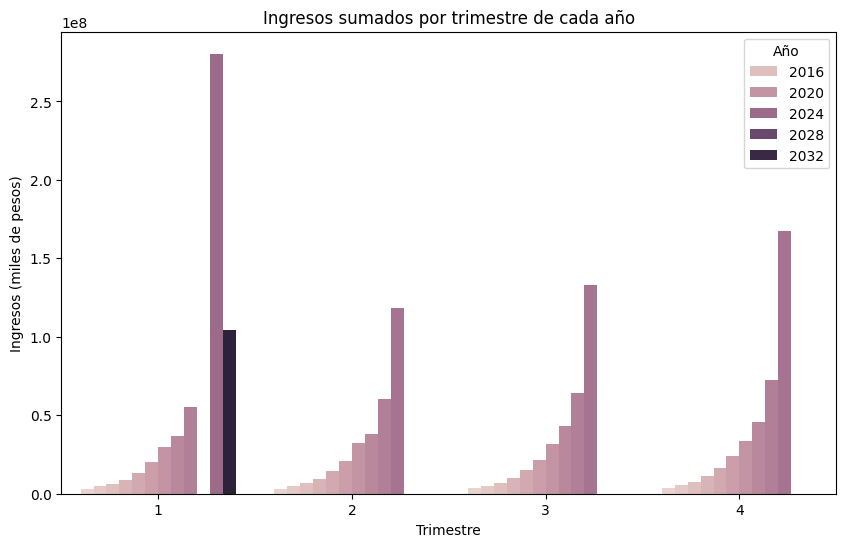

In [18]:
# Agrupo por Año y Trimestre para sumar los ingresos
df_agrupado = df_Ingresos.groupby(['Año', 'Trimestre'])['Ingresos (miles de pesos)'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_agrupado, x='Trimestre', y='Ingresos (miles de pesos)', hue='Año')

plt.title('Ingresos sumados por trimestre de cada año')
plt.xlabel('Trimestre')
plt.ylabel('Ingresos (miles de pesos)')
plt.legend(title='Año')
plt.show()

Veo que hay Outliers de años futuros: corresponde a un 2033 que por el tipo de tabla, corresponde a un 2023 con error de tipeo.

In [15]:
df_Ingresos.query('Año > 2024') #para asegurarme que es uno solo y confirmar por la columna período en realidad es que es 2023 

,Año,Trimestre,Ingresos (miles de pesos),Periodo
4,2033,1,104134992.81,Ene-Mar 2023


In [16]:
#reemplazo
df_agrupado = df_Ingresos.groupby(['Año', 'Trimestre'])['Ingresos (miles de pesos)'].sum().reset_index()
df_Ingresos['Año'] = df_Ingresos['Año'].replace(2033, 2023)

Grafico de nuevo: 

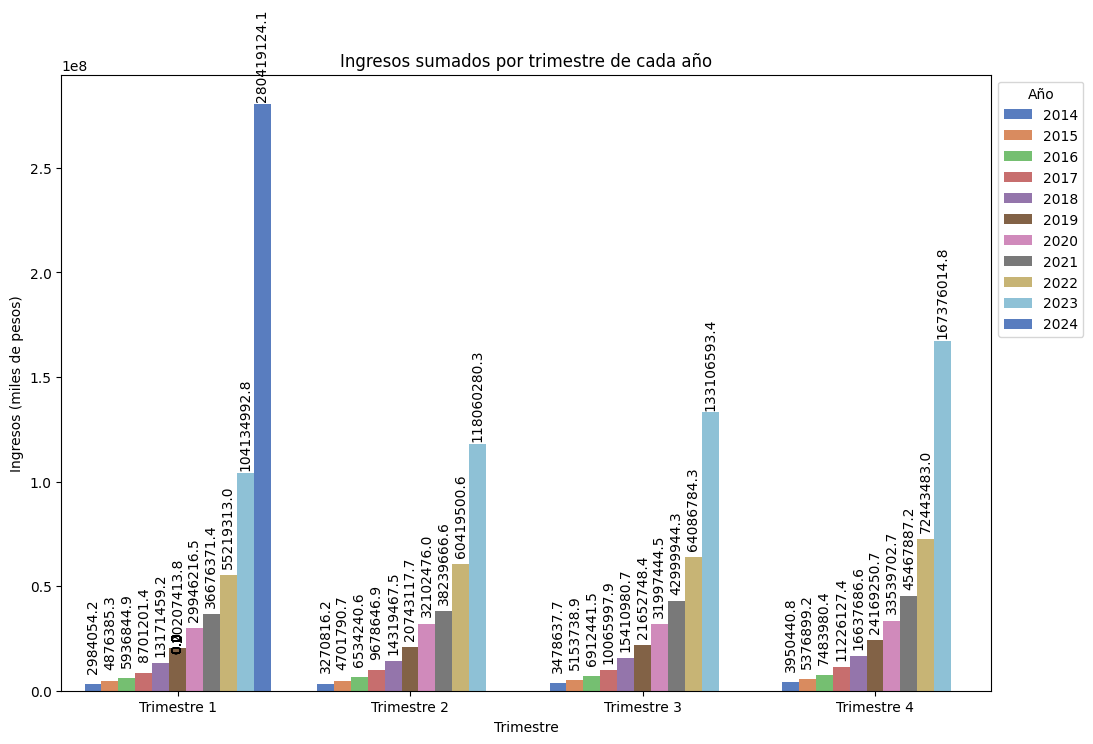

In [23]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_Ingresos, x='Trimestre', y='Ingresos (miles de pesos)', hue='Año', errorbar=None, palette='muted')

plt.title('Ingresos sumados por trimestre de cada año')
plt.xlabel('Trimestre')
plt.ylabel('Ingresos (miles de pesos)')

# Ajusto el orden del eje x
plt.xticks(ticks=[0, 1, 2, 3], labels=['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4'])
#coloco la leyenda
plt.legend(title='Año', loc='upper left', bbox_to_anchor=(1, 1))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 35), 
                textcoords = "offset points",
                rotation=90)
plt.show()


Veo un valor atípico en el 2024 - trimestre 1, es un crecimiento que se sale de la tendencia- Pero voy a dejar eso para después.

In [24]:
#exporto el dataset Ingresos a un csv o parquet

In [25]:
df_Totales_Accesos_Por_Tecnología  #quisiera comparar
df_Totales_Accesos_por_velocidad.head(1)

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2024,1,28801,69355,866152,950930,672155,353896,8363694,328173,11633156


Aqui probablemente haya una correlación entre ingresos en pesos y conexiones, lo importante aqui es què tipo de conexion se usa màs o si hay valores faltantes en estas tablas. 
Puedo hacer que el gráfico comience en 06 por ej

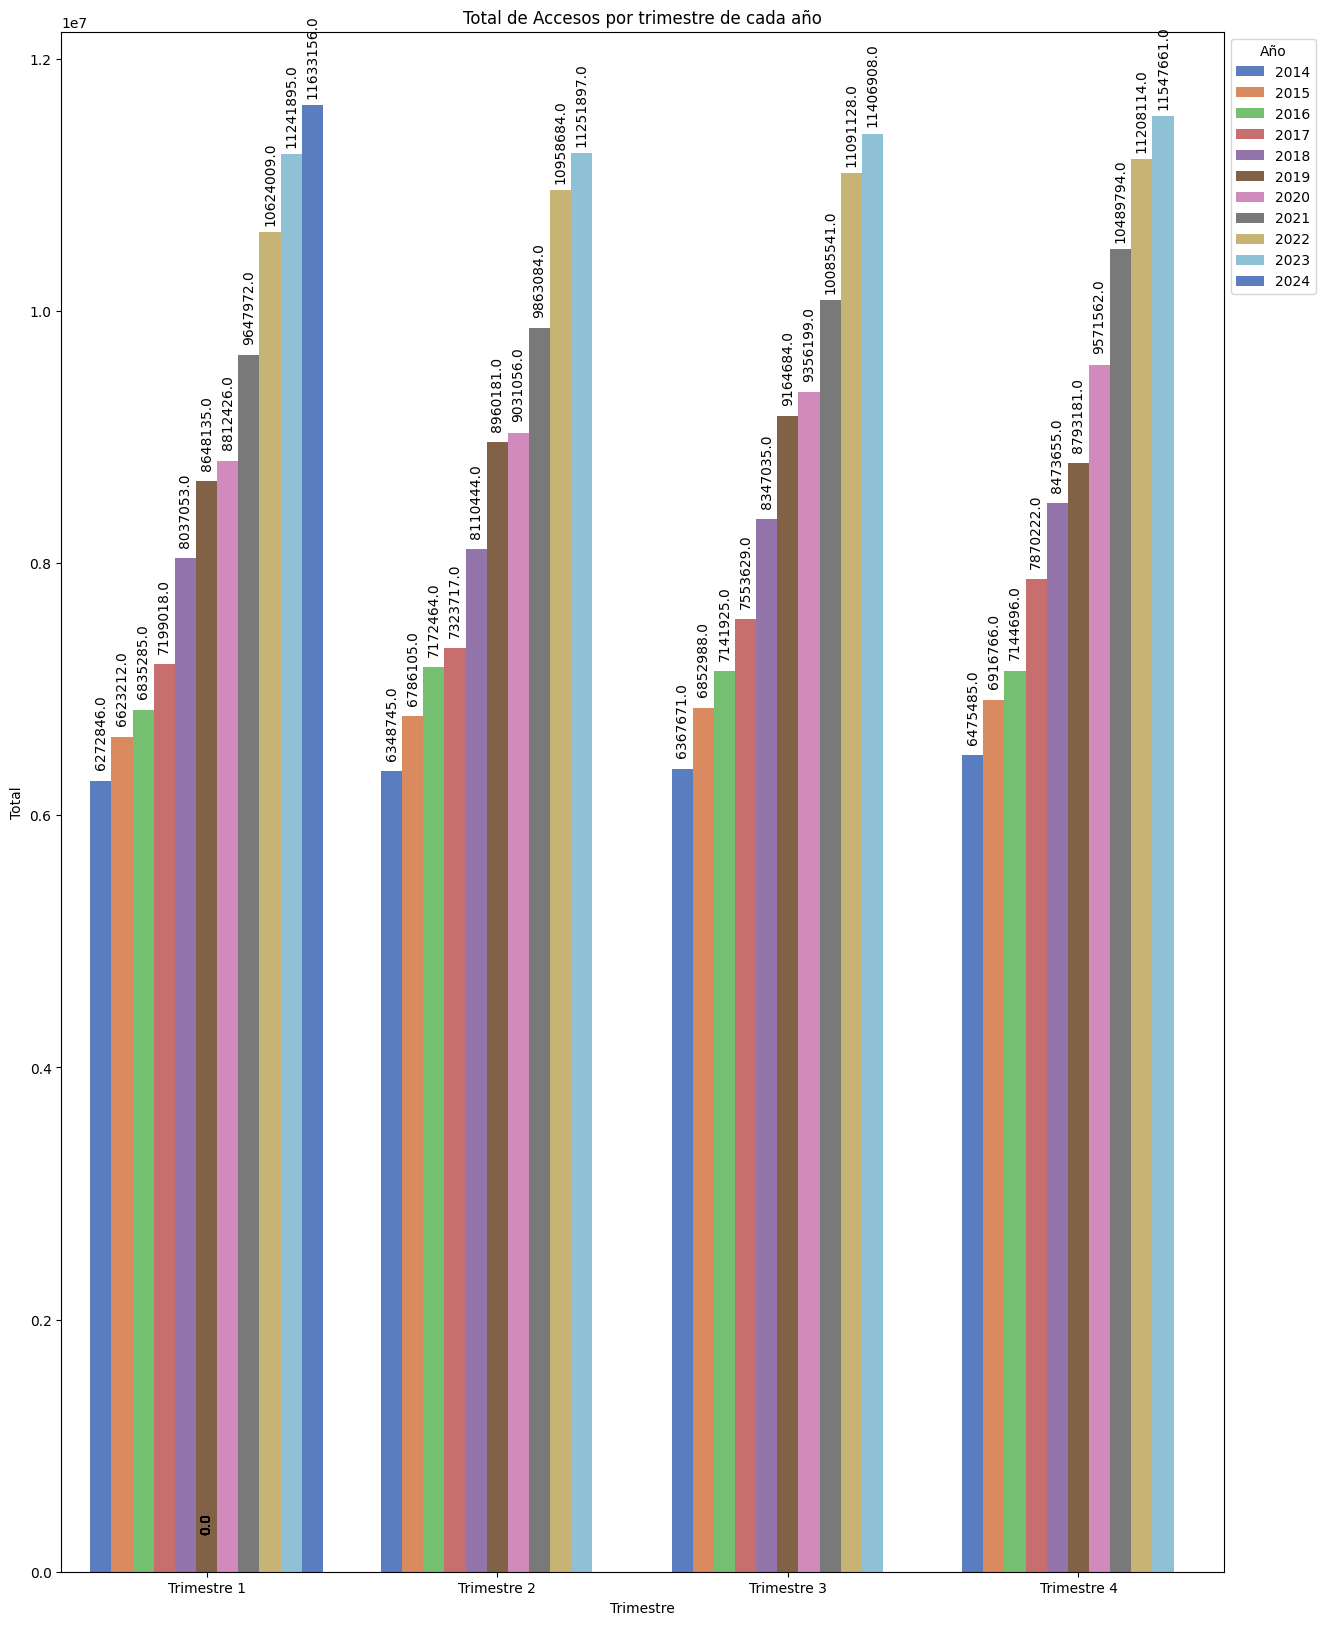

In [26]:
plt.figure(figsize=(15,20))
ax = sns.barplot(data=df_Totales_Accesos_por_velocidad, x='Trimestre', y='Total', hue='Año', errorbar=None, palette='muted')

plt.title('Total de Accesos por trimestre de cada año')
plt.xlabel('Trimestre')
plt.ylabel('Total')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4'])
plt.legend(title='Año', loc='upper left', bbox_to_anchor=(1, 1))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 35), 
                textcoords = "offset points",
                rotation=90)
plt.show()

Ahora lo importante es entender qué hojas usar pàra mi análisis: 

## Haré:
### demanda de internet por provincia
### demanda de internet por provincia (solo fibra óptica)

In [17]:
df_Accesos_Por_Tecnología.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.00,2790663.00,1799013.00,150290.00,101294.00,5044557.00
1,2024,1,Capital Federal,70108.00,1177475.00,203756.00,4493.00,48879.00,1504711.00
2,2024,1,Catamarca,5901.00,11025.00,56542.00,1384.00,81.00,74933.00
3,2024,1,Chaco,11343.00,58929.00,64463.00,8404.00,12404.00,155543.00
4,2024,1,Chubut,26306.00,77217.00,26356.00,30867.00,9930.00,170676.00


Veré en el último año, como está la tecnologìa Fibra Óptica en cada provincia. 

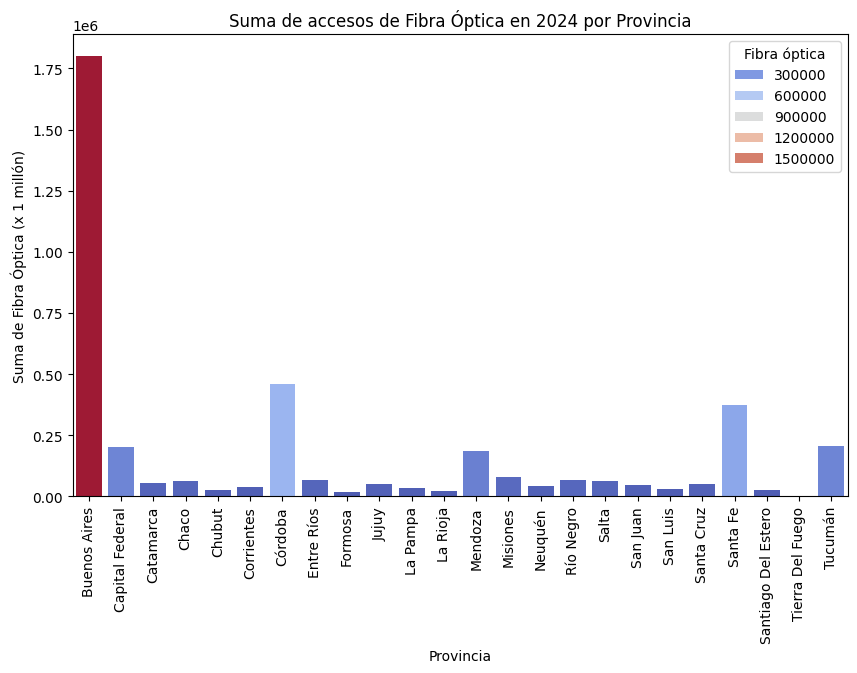

In [22]:
df_filtered = df_Accesos_Por_Tecnología[['Año', 'Provincia', 'Fibra óptica']]

df_2024 = df_filtered[df_filtered['Año'] == 2024]

df_grouped = df_2024.groupby('Provincia')['Fibra óptica'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='Provincia', y='Fibra óptica', palette='coolwarm', hue='Fibra óptica', dodge=False)
plt.title('Suma de accesos de Fibra Óptica en 2024 por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Suma de Fibra Óptica (x 1 millón)')
plt.xticks(rotation=90)
plt.show()

Voy a organizar para que esté como Top N:

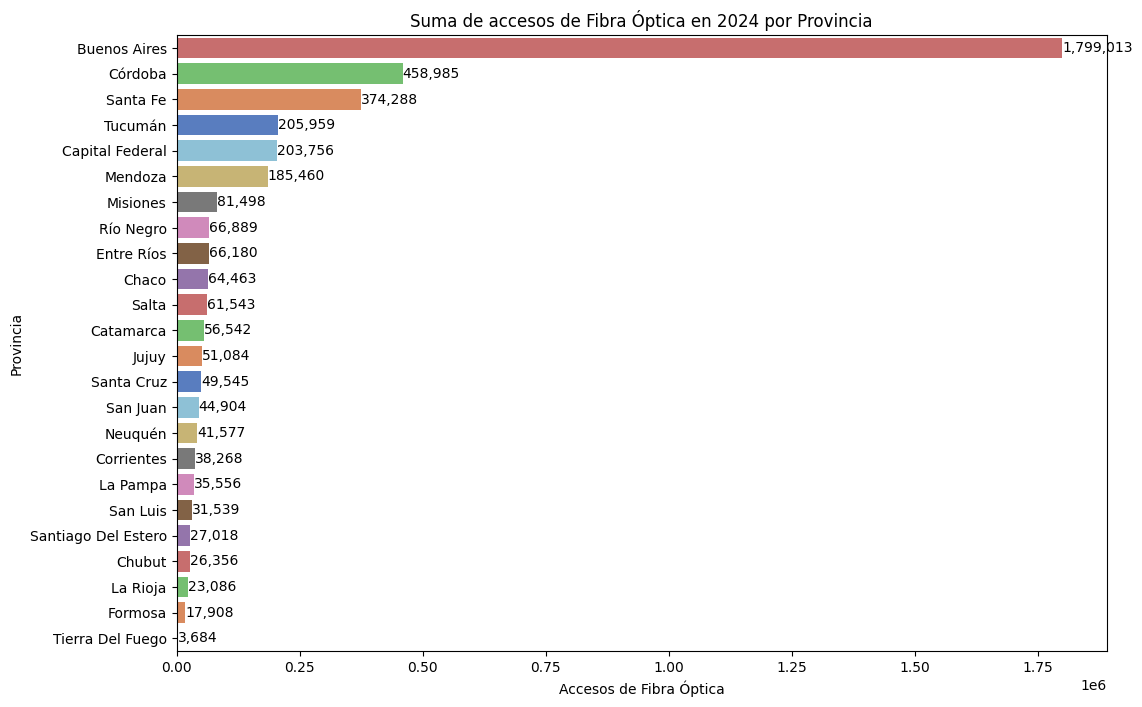

In [29]:
df_grouped = df_grouped.sort_values(by='Fibra óptica', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_grouped, x='Fibra óptica', y='Provincia', palette='muted', hue="Fibra óptica", legend=False)

for index, value in enumerate(df_grouped['Fibra óptica']):
    plt.text(value, index, f'{value:,.0f}', va='center')

plt.title('Suma de accesos de Fibra Óptica en 2024 por Provincia')
plt.xlabel('Accesos de Fibra Óptica')
plt.ylabel('Provincia')
plt.show()

ahora, es importante entender la relacion habitante penetraciòn, para saber si hay lugar en el mercado para el ingreso de mas servicio. Por otro lado, si existe la posibilidad de convertir clientes con tecnologìas menos veloces a fibra optica. 

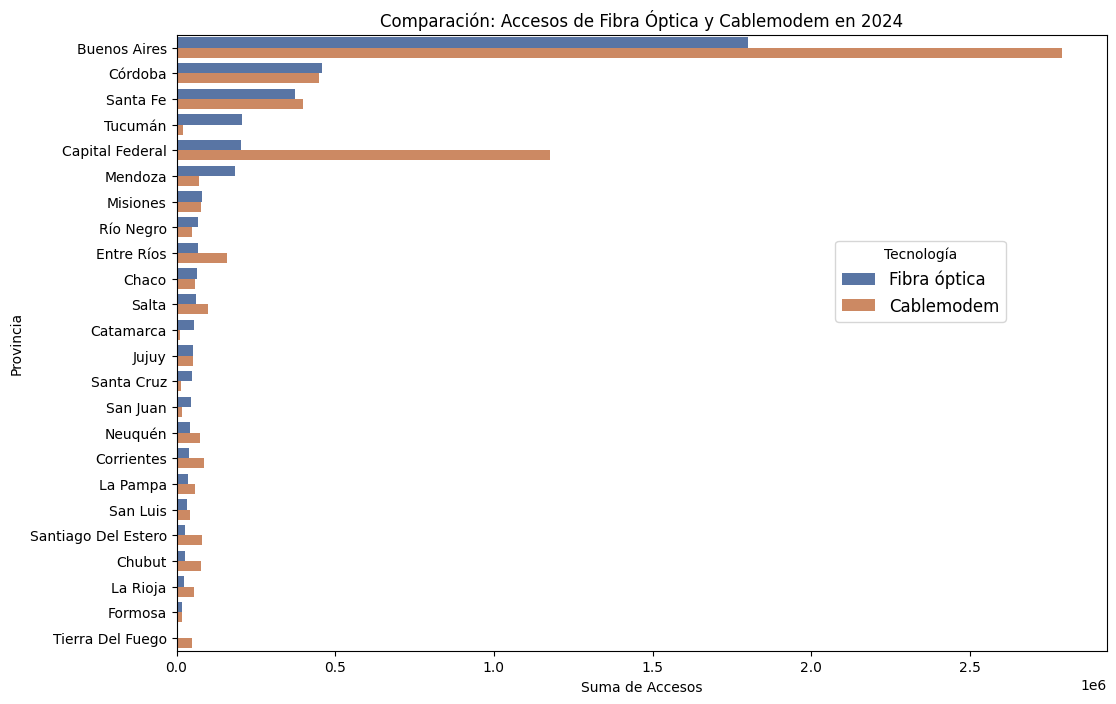

In [30]:
df_filtered = df_Accesos_Por_Tecnología[['Año', 'Provincia', 'Fibra óptica', 'Cablemodem']]
df_2024 = df_filtered[df_filtered['Año'] == 2024]
df_grouped = df_2024.groupby('Provincia')[['Fibra óptica', 'Cablemodem']].sum().reset_index()

df_grouped = df_grouped.sort_values(by='Fibra óptica', ascending=False)
df_melted = df_grouped.melt(id_vars='Provincia', value_vars=['Fibra óptica', 'Cablemodem'], var_name='Tecnología', value_name='Accesos')

plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=df_melted, x='Accesos', y='Provincia', hue='Tecnología', palette='deep')
plt.title('Comparación: Accesos de Fibra Óptica y Cablemodem en 2024')
plt.xlabel('Suma de Accesos')
plt.ylabel('Provincia')
plt.legend(title='Tecnología', loc='center', fontsize='large', bbox_to_anchor=(0.8, 0.6))
plt.show()


En general calbelmodem es mas demandado, pero en buenos aires y en capital, el cablemodem es muchísimo más usado que la fibra optica (por qué?). En las provincias top de consumo, por su poblaciòn (quizá) està parejo. COmo la fibra es más rápida y de uso domestico, a dif del cablemodem que corresponde màs a empresas, tendría que ver qué margen de crecimiento queda para la fibra:

Quisiera ver si la penetración es proporcional a la poblacion solamente, y si puedo calcular un porcentaje de penetración por hogares y así entender que margen de crecimiento posible existe:

In [31]:
df_Penetracion_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


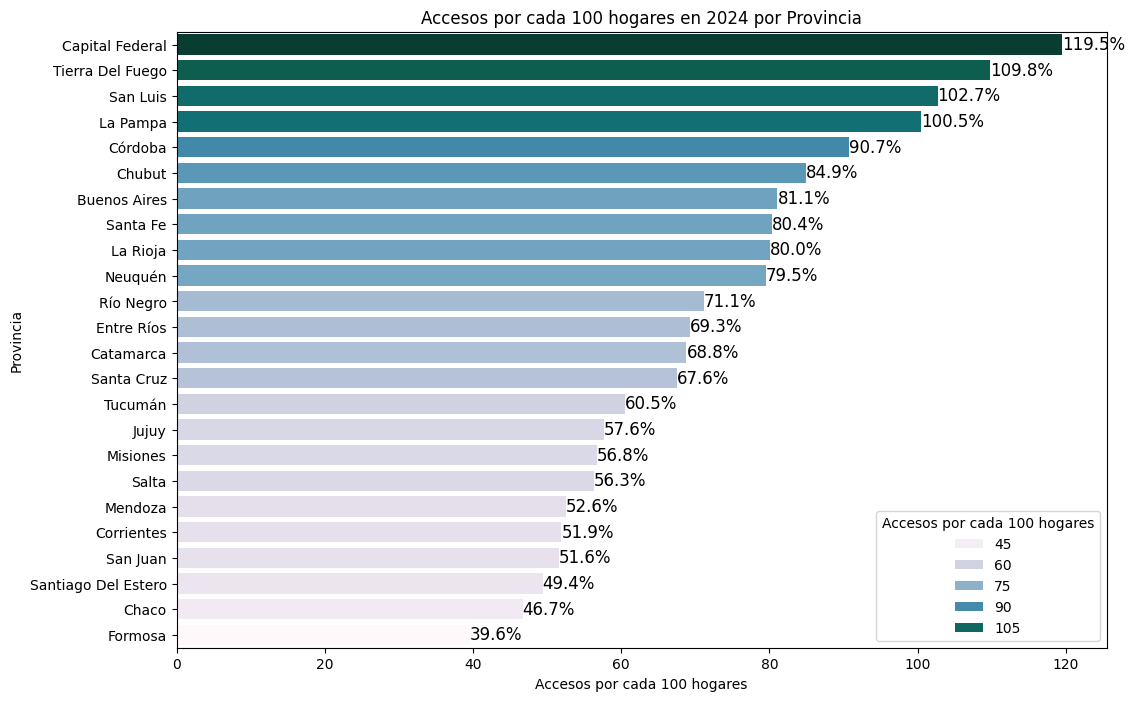

In [32]:
df_filtered2 = df_Penetracion_hogares[['Año', 'Provincia', 'Accesos por cada 100 hogares']]
df_penetracion = df_filtered2[df_filtered2['Año'] == 2024]
df_penetracion = df_penetracion.sort_values(by='Accesos por cada 100 hogares', ascending=False)
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=df_penetracion, x='Accesos por cada 100 hogares', y='Provincia', palette='PuBuGn', hue='Accesos por cada 100 hogares')

for index, value in enumerate(df_penetracion['Accesos por cada 100 hogares']):
    plt.text(value, index, f'{value:.1f}%', va='center', ha='left', fontsize=12, color='black')

plt.title('Accesos por cada 100 hogares en 2024 por Provincia')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Provincia')
plt.show()


Si tengo una tasa de conversion/traspaso de tecnologia Cablemodem a Fibra, podría predecir una demanda:

In [23]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           985 non-null    object 
 1   Provincia     984 non-null    object 
 2   Fibra óptica  984 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.2+ KB


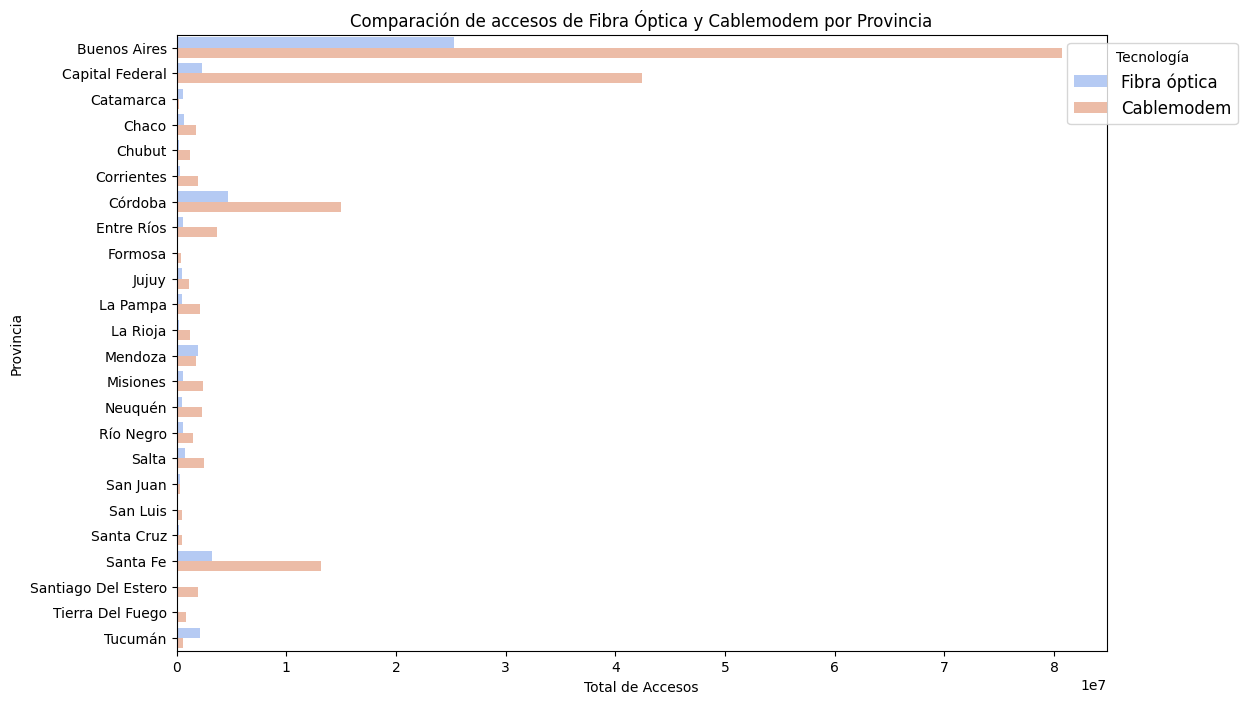

In [24]:
df_filto_comparacion = df_Accesos_Por_Tecnología[['Año','Provincia', 'Fibra óptica', 'Cablemodem']]

df_agrupado = df_filto_comparacion.groupby('Provincia')[['Fibra óptica', 'Cablemodem']].sum().reset_index()

df_g_melted = df_agrupado.melt(id_vars='Provincia', value_vars=['Fibra óptica', 'Cablemodem'], var_name='Tecnología', value_name='Total Accesos')

plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=df_g_melted, x='Total Accesos', y='Provincia', hue='Tecnología', palette='coolwarm')
plt.title('Comparación de accesos de Fibra Óptica y Cablemodem por Provincia')
plt.xlabel('Total de Accesos')
plt.ylabel('Provincia')
plt.legend(title='Tecnología', loc='upper right', fontsize='large', bbox_to_anchor=(1.15, 1))  # Ajusta la posición de la leyenda
plt.show()



Hay una prevalencia general de cablemodem. Si se considera que (por medio de una buena campaña) esas tecnologías van a migrar a fibra óptica -lo cual sucede porque fibra es más moderna-, lo que ahora es cablemodem podría volverse Fibra.

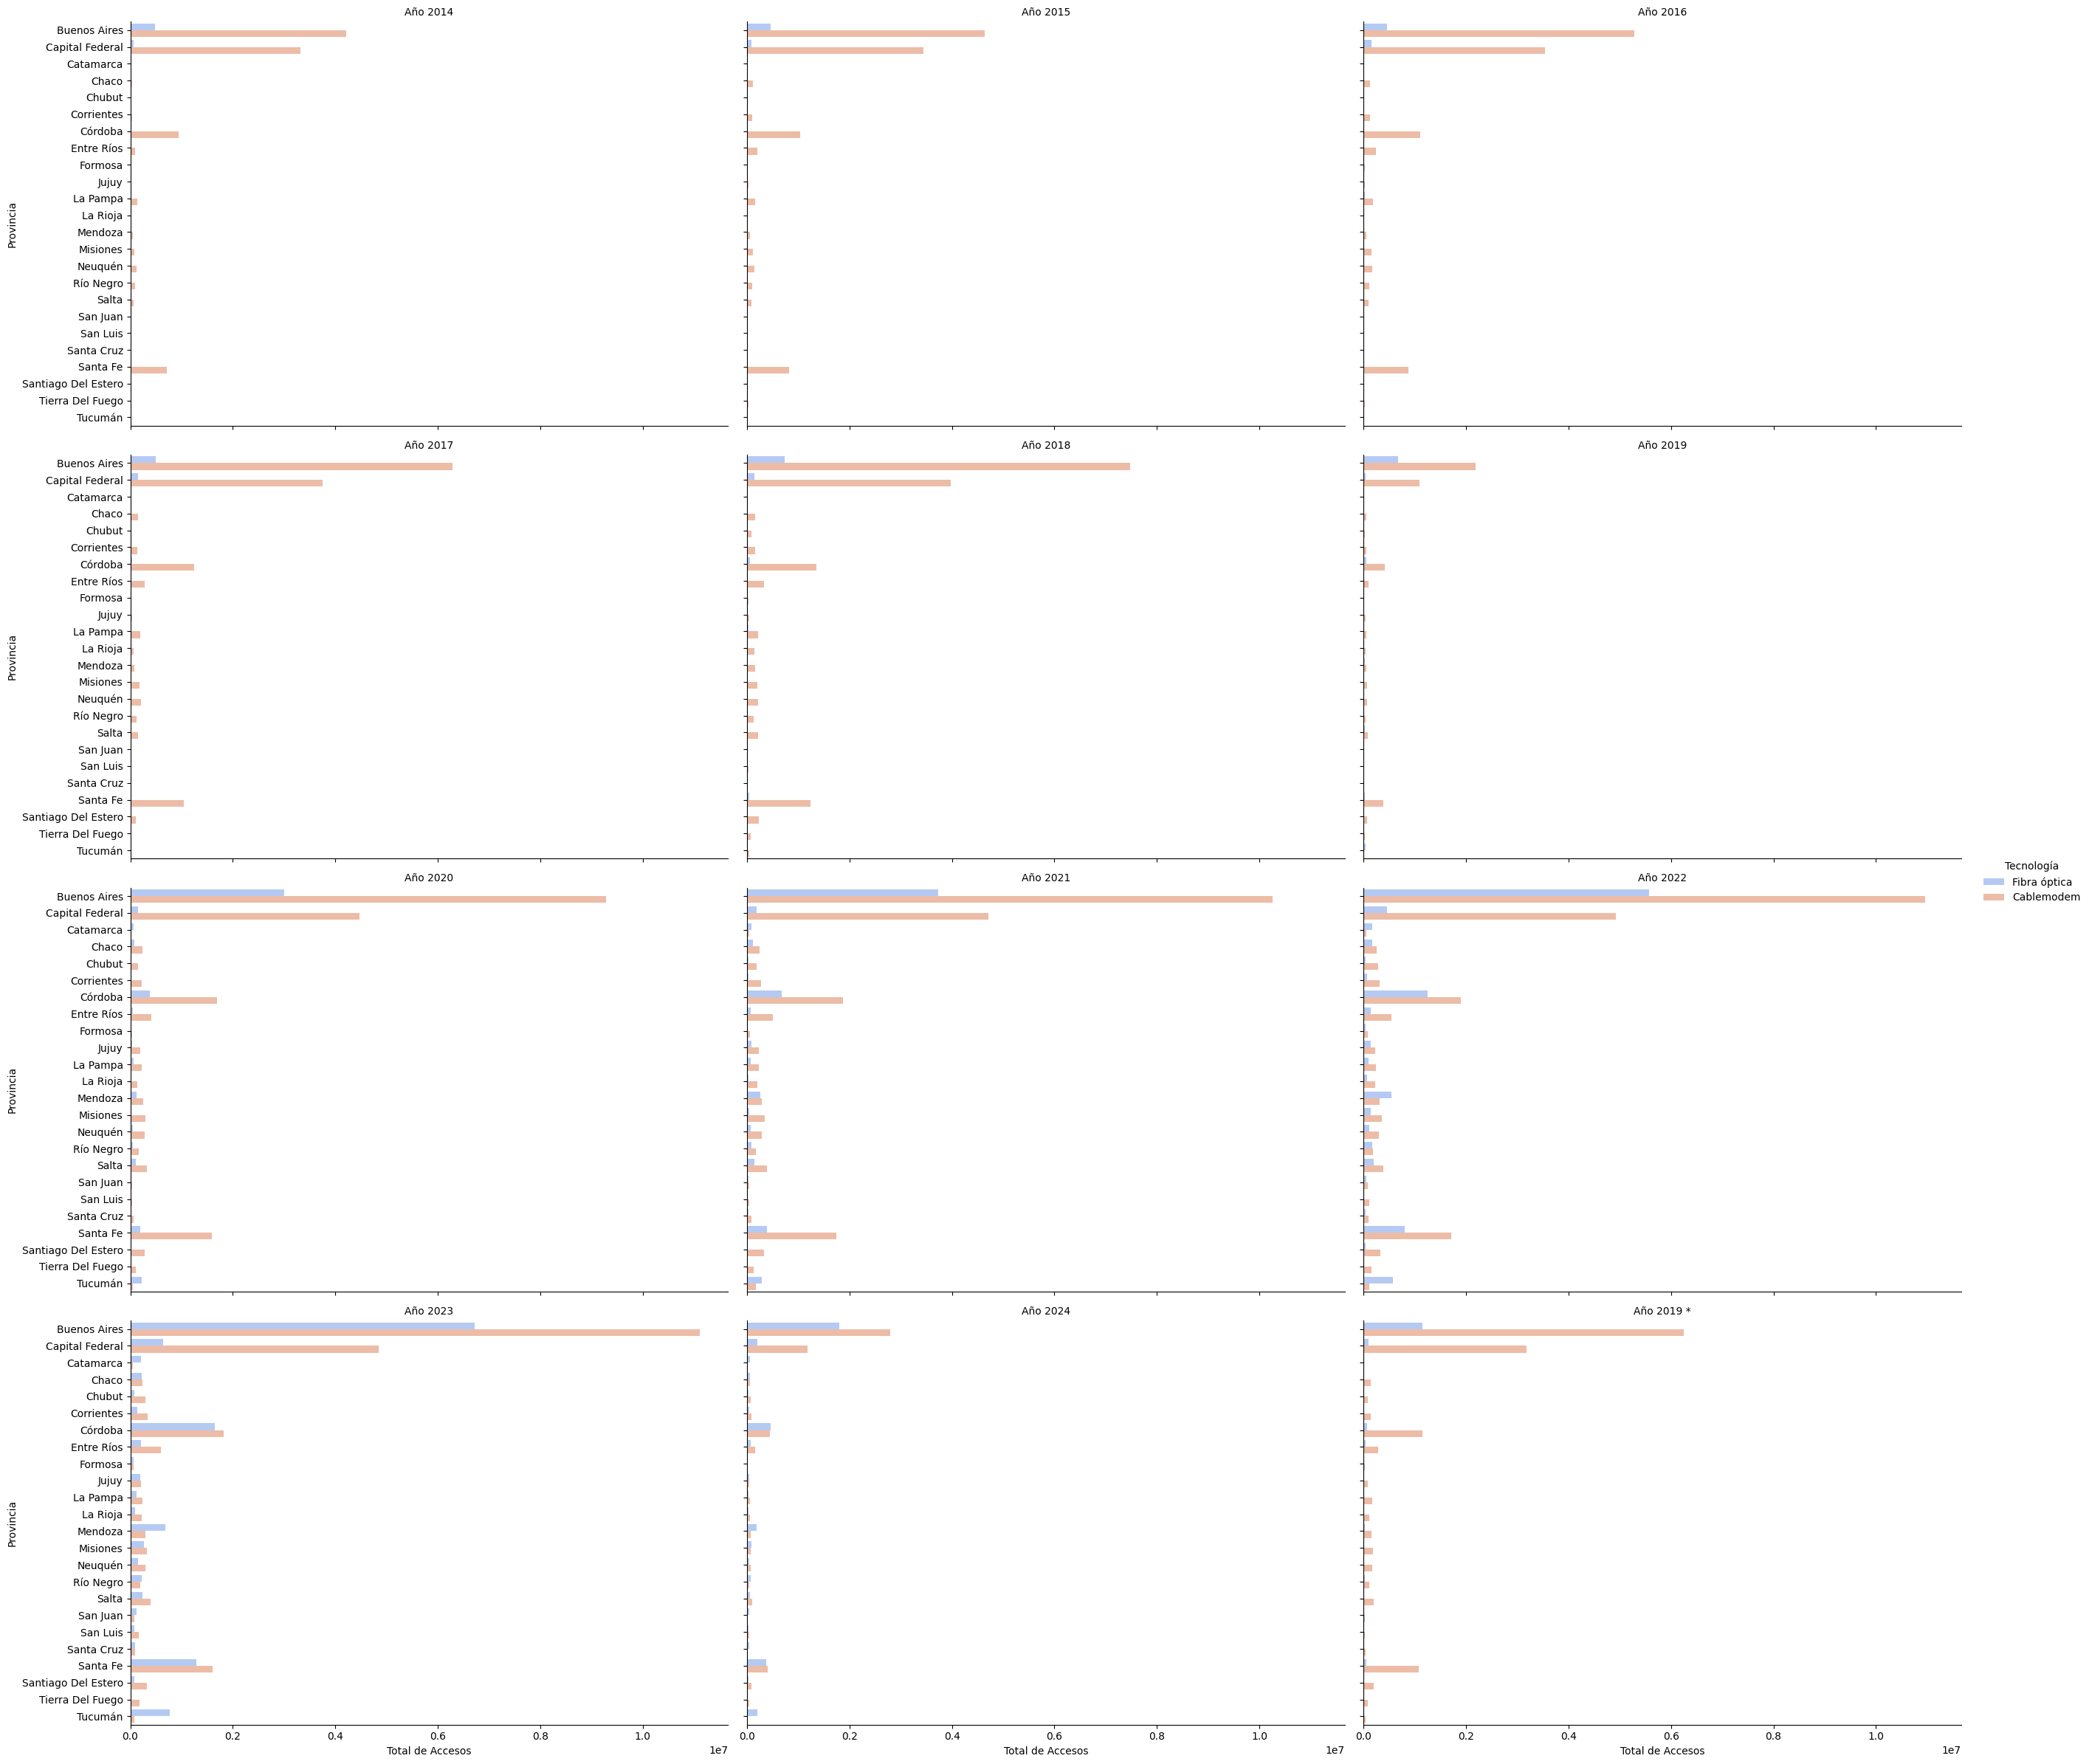

In [35]:
df_agrupado = df_Accesos_Por_Tecnología.groupby(['Año', 'Provincia'])[['Fibra óptica', 'Cablemodem']].sum().reset_index()

# Transformar el DataFrame a un formato largo adecuado para seaborn
df_agrupado_mezclado = df_agrupado.melt(id_vars=['Año', 'Provincia'], value_vars=['Fibra óptica', 'Cablemodem'], var_name='Tecnología', value_name='Total Accesos')

# Crear un FacetGrid para separar los gráficos por año
g = sns.FacetGrid(df_agrupado_mezclado, col='Año', col_wrap=3, height=6, aspect=1.5)
g.map_dataframe(sns.barplot, x='Total Accesos', y='Provincia', hue='Tecnología', palette='coolwarm', errorbar=None)

# Ajustar la leyenda y los títulos
g.add_legend(title='Tecnología', adjust_subtitles=True)
g.set_axis_labels('Total de Accesos', 'Provincia')
g.set_titles(col_template='Año {col_name}')

plt.show()

ValueError: Unable to parse string "2019 *" at position 44

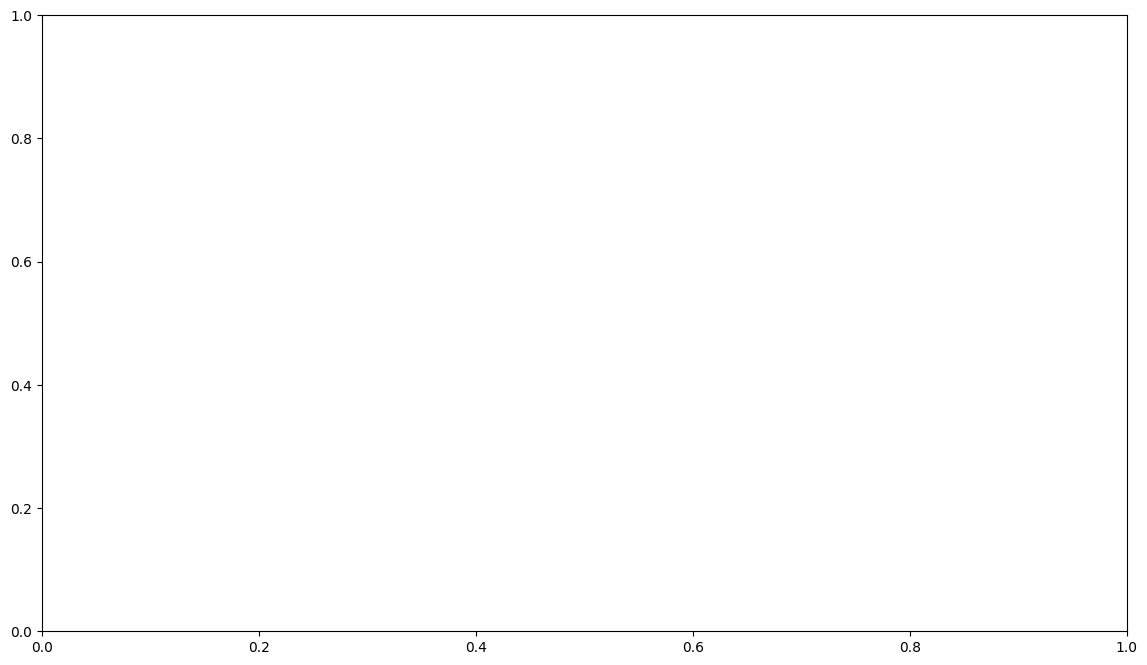

In [25]:
provincias_deseadas = ['Santa Fe', 'Córdoba', 'Capital Federal', 'Buenos Aires']
df_filtered = df_Accesos_Por_Tecnología[['Año', 'Provincia', 'Fibra óptica', 'Cablemodem']]
df_filtered = df_filtered[df_filtered['Provincia'].isin(provincias_deseadas)]

df_grouped = df_filtered.groupby(['Año', 'Provincia'])[['Fibra óptica', 'Cablemodem']].sum().reset_index()

df_grouped_melted = df_grouped.melt(id_vars=['Año', 'Provincia'], value_vars=['Fibra óptica', 'Cablemodem'], var_name='Tecnología', value_name='Total Accesos')

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_grouped_melted, x='Año', y='Total Accesos', hue='Tecnología', style='Provincia', markers=True, dashes=False, palette='coolwarm')

# Ajustar la leyenda y los títulos
plt.title('Evolución de los accesos de Fibra Óptica y Cablemodem a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Total de Accesos')
plt.legend(title='Tecnología y Provincia')
plt.xticks(df_grouped['Año'].unique())
plt.grid(True)

plt.show()


Obtengo un "ValueError: Unable to parse string "2019 *" at position 44"
Eso está en la tabla original, en Accesos por tencología. En la columna año hay un valor de año cargado con un *


In [21]:
#df_Accesos_Por_Tecnología['Año'] = pd.to_numeric(df_Accesos_Por_Tecnología['Año'], errors='coerce')
#df_Accesos_Por_Tecnología = df_Accesos_Por_Tecnología.dropna(subset=['Año'])
#df['Año'] = df['Año'].astype(int)

In [23]:
df_Accesos_Por_Tecnología.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024.00,1,Buenos Aires,203297.00,2790663.00,1799013.00,150290.00,101294.00,5044557.00
1,2024.00,1,Capital Federal,70108.00,1177475.00,203756.00,4493.00,48879.00,1504711.00
2,2024.00,1,Catamarca,5901.00,11025.00,56542.00,1384.00,81.00,74933.00
3,2024.00,1,Chaco,11343.00,58929.00,64463.00,8404.00,12404.00,155543.00
4,2024.00,1,Chubut,26306.00,77217.00,26356.00,30867.00,9930.00,170676.00


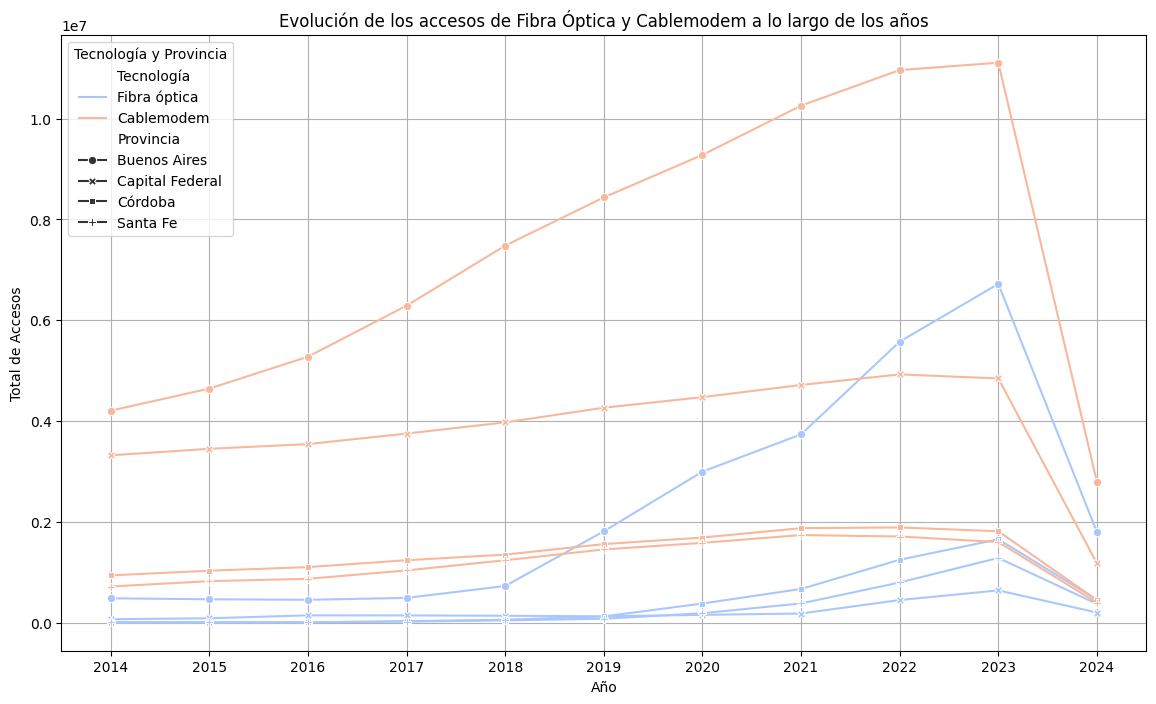

In [ ]:
provincias_deseadas = ['Santa Fe', 'Córdoba', 'Capital Federal', 'Buenos Aires']
df_filtrado = df_Accesos_Por_Tecnología[['Año', 'Provincia', 'Fibra óptica', 'Cablemodem']]
df_filtrado = df_filtrado[df_filtrado['Provincia'].isin(provincias_deseadas)]
df_filtrado['Año'] = df_filtrado['Año'].apply(lambda x: str(x).split('*')[0]).str.strip()
df_filtrado['Año'] = pd.to_numeric(df_filtrado['Año'], errors='coerce').astype('Int64')
df_filtrado = df_filtrado.dropna(subset=['Año'])
df_agrupado = df_filtrado.groupby(['Año', 'Provincia'])[['Fibra óptica', 'Cablemodem']].sum().reset_index()
df_agrupado_melt = df_agrupado.melt(id_vars=['Año', 'Provincia'], value_vars=['Fibra óptica', 'Cablemodem'], var_name='Tecnología', value_name='Total Accesos')

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_agrupado_melt, x='Año', y='Total Accesos', hue='Tecnología', style='Provincia', markers=True, dashes=False, palette='coolwarm')

plt.title('Evolución de los accesos de Fibra Óptica y Cablemodem a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Total de Accesos')
plt.legend(title='Tecnología y Provincia')
plt.xticks(df_agrupado['Año'].unique())
plt.grid(True)

plt.show()


La caida en 2024 es porque solo tenemos en cuenta el primer trimestre. Es evidente que hay un ascenso en el uso de la fibra optica:

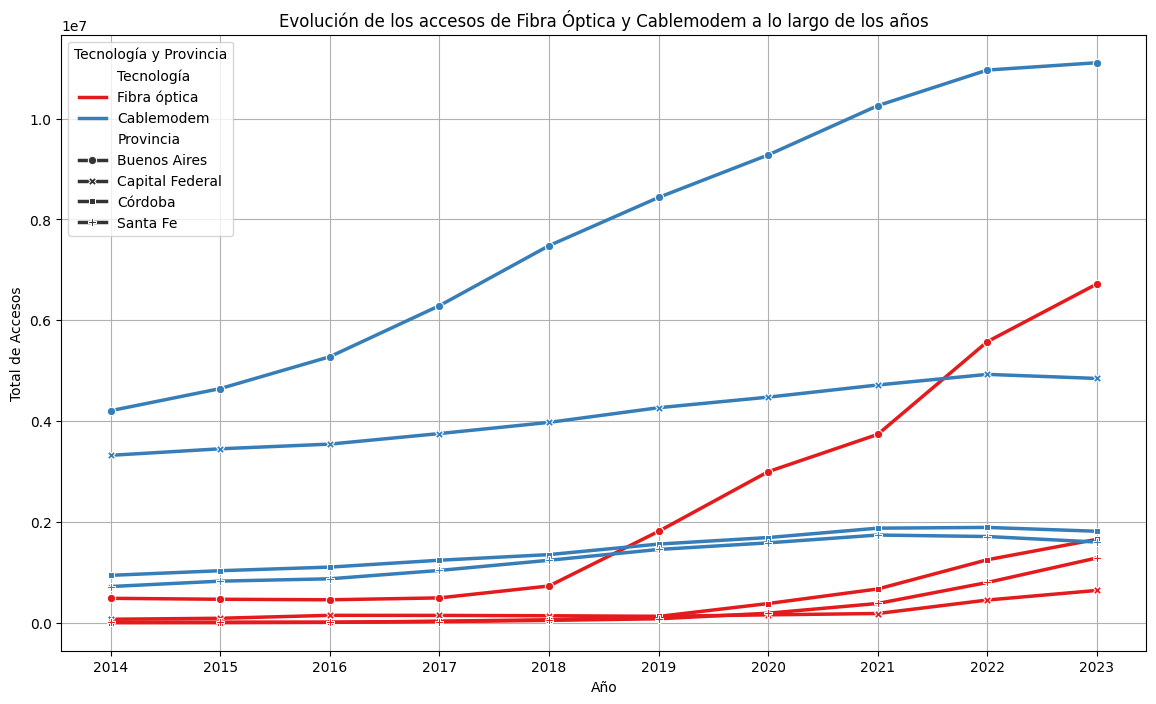

In [26]:
provincias_deseadas = ['Santa Fe', 'Córdoba', 'Capital Federal', 'Buenos Aires']
df_filtrado = df_Accesos_Por_Tecnología[['Año', 'Provincia', 'Fibra óptica', 'Cablemodem']]
df_filtrado = df_filtrado[df_filtrado['Provincia'].isin(provincias_deseadas)]
df_filtrado['Año'] = df_filtrado['Año'].apply(lambda x: str(x).split('*')[0]).str.strip()
df_filtrado['Año'] = pd.to_numeric(df_filtrado['Año'], errors='coerce').astype('Int64')
df_filtrado = df_filtrado.dropna(subset=['Año'])
df_filtrado = df_filtrado[df_filtrado['Año'] != 2024]
df_agrupado = df_filtrado.groupby(['Año', 'Provincia'])[['Fibra óptica', 'Cablemodem']].sum().reset_index()
df_agrupado_melt = df_agrupado.melt(id_vars=['Año', 'Provincia'], value_vars=['Fibra óptica', 'Cablemodem'], var_name='Tecnología', value_name='Total Accesos')

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=df_agrupado_melt, 
    x='Año', 
    y='Total Accesos', 
    hue='Tecnología', 
    style='Provincia', 
    markers=True, 
    dashes=False, 
    palette='Set1',  # Puedes cambiar a la paleta que prefieras
    linewidth=2.5    # Grosor de las líneas
)

plt.title('Evolución de los accesos de Fibra Óptica y Cablemodem a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Total de Accesos')
plt.legend(title='Tecnología y Provincia')
plt.xticks(df_agrupado['Año'].unique())
plt.grid(True)

plt.show()


corrijo definitivamente el problema que tengo en Año

In [36]:
df_Accesos_Por_Tecnología['Año'] = df_Accesos_Por_Tecnología['Año'].apply(lambda x: str(x).split('*')[0]).str.strip()
df_Accesos_Por_Tecnología['Año'] = pd.to_numeric(df_Accesos_Por_Tecnología['Año'], errors='coerce').astype('Int64')
df_Accesos_Por_tecnología = df_Accesos_Por_Tecnología.dropna(subset=['Año'])

como corregí el DF por el problema que tuve con ese dato de Año mal cargado, regenero el df_filtrado: 


In [28]:
df_filtrado = df_Accesos_Por_Tecnología[['Año', 'Provincia', 'Fibra óptica', 'Cablemodem']]

confirmo que no tendré problemas con Año

In [29]:
print(df_filtrado['Año'].unique())

<IntegerArray>
[2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, <NA>]
Length: 12, dtype: Int64


In [31]:
df_filtrado.head(1)

,Año,Provincia,Fibra óptica,Cablemodem
0,2024,Buenos Aires,1799013.00,2790663.00


Las predicciones de crecimiento para Fibra Óptica en Buenos Aires y Capital son buenas.

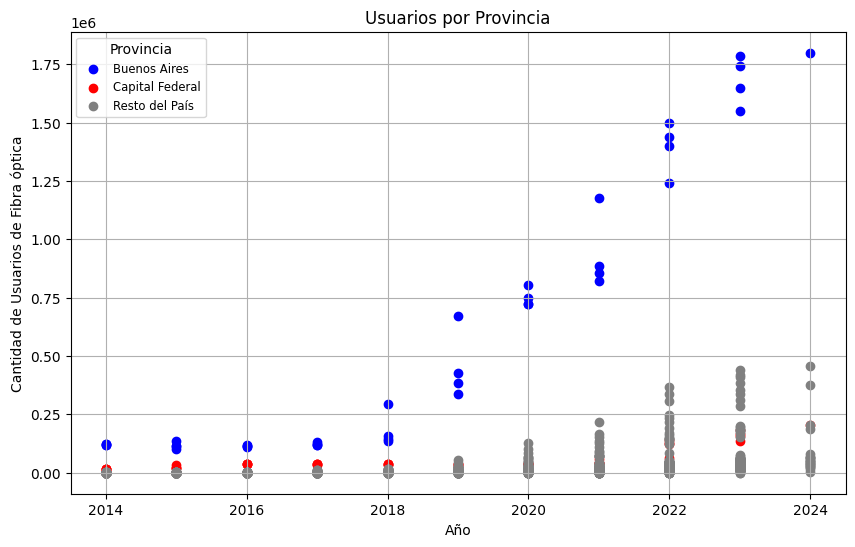

In [50]:
plt.figure(figsize=(10, 6))
colors = {'Buenos Aires': 'blue', 'Capital Federal': 'red'}
default_color = 'gray'

for provincia in df_filtrado['Provincia'].unique():
    subset = df_filtrado[df_filtrado['Provincia'] == provincia]
    color = colors.get(provincia, default_color)
    label = provincia if provincia in colors else 'Resto del País'
    plt.scatter(subset['Año'], subset['Fibra óptica'], color=color, label=label)

plt.xlabel('Año')
plt.ylabel('Cantidad de Usuarios de Fibra óptica')
plt.title('Usuarios por Provincia')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Provincia', fontsize='small', title_fontsize='medium', loc='upper left')
plt.grid(True)
plt.show()

A partir de 2018 comenzó a crecer el servicio en todo el pais, pero en Buenos Aires  ese crecimiento es mucho mayor que en el resto del pais, incluso en Capital Federal:

Veo cómo es para Cablomodem: 

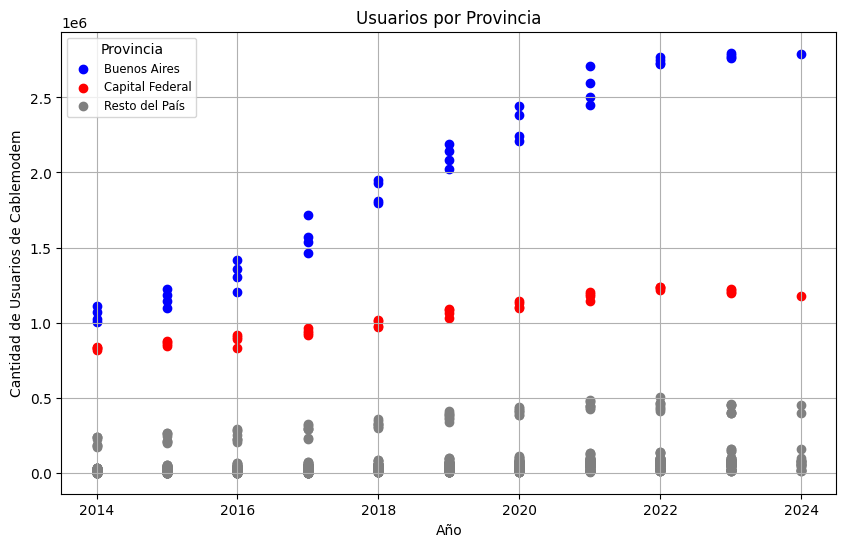

In [47]:
plt.figure(figsize=(10, 6))
colors = {'Buenos Aires': 'blue', 'Capital Federal': 'red'}
default_color = 'gray'

for provincia in df_filtrado['Provincia'].unique():
    subset = df_filtrado[df_filtrado['Provincia'] == provincia]
    color = colors.get(provincia, default_color)
    label = provincia if provincia in colors else 'Resto del País'
    plt.scatter(subset['Año'], subset['Cablemodem'], color=color, label=label)

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de Usuarios de Cablemodem')
plt.title('Usuarios por Provincia')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Provincia', fontsize='small', title_fontsize='medium', loc='upper left')

# Mostrar el gráfico
plt.grid(True)
plt.show()


En cablemodem sí vemos un crecimiento mayor al resto de las provincias en Capital Federal, aunque también mucho menor que en Buenos Aires.

Voy a intentar predecir qué sucederá con el consumo: Fibra óptica podría alcanzar a Cablemodem como ya hizo en cordoba. ¿podría ser interesante pensar esa opcion en Capital y Buenos Aires, dende hay un gran caudal de potenciales clientes?
Aqui voy a usar ML

In [52]:
from prophet import Prophet

13:14:29 - cmdstanpy - INFO - Chain [1] start processing
13:14:29 - cmdstanpy - INFO - Chain [1] done processing
13:14:29 - cmdstanpy - INFO - Chain [1] start processing
13:14:29 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Agustin\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
c:\Users\Agustin\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Agustin\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecat

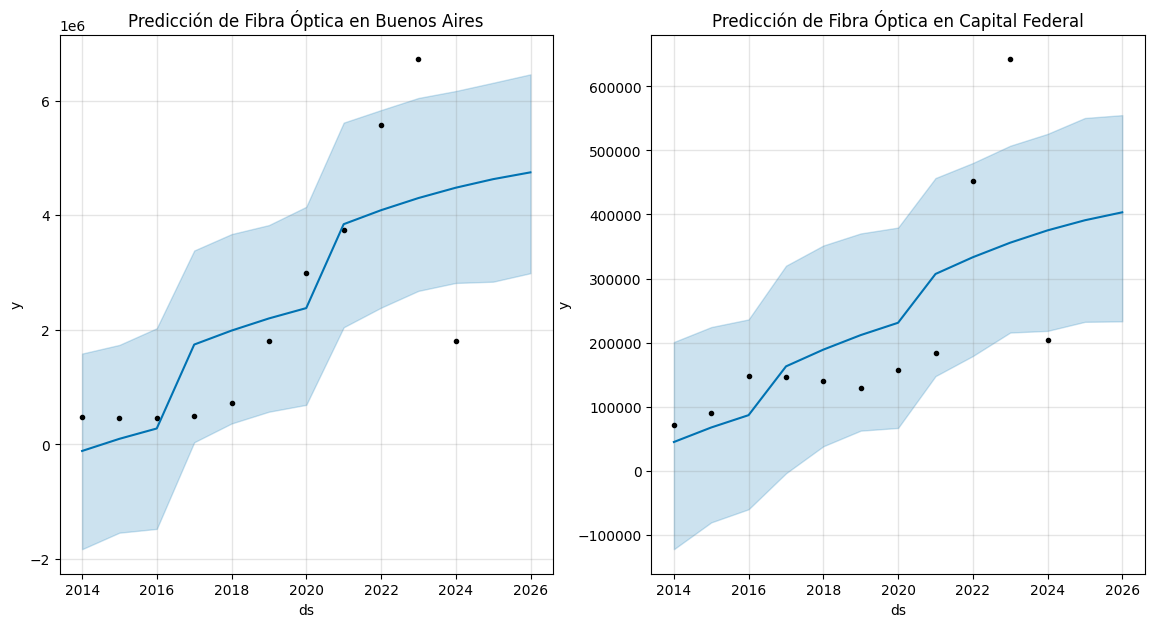

In [53]:
provincias_deseadas = ['Buenos Aires', 'Capital Federal']
df_filtrado_pred = df_Accesos_Por_Tecnología[['Año', 'Provincia', 'Fibra óptica']]
df_filtrado_pred = df_filtrado_pred[df_filtrado_pred['Provincia'].isin(provincias_deseadas)]

# Aqui debí Eliminar las filas donde 'Año' no es un número
df_filtrado_pred = df_filtrado_pred[pd.to_numeric(df_filtrado_pred['Año'], errors='coerce').notnull()]
df_filtrado_pred['Año'] = df_filtrado_pred['Año'].astype(int)
df_filtrado_pred['Año'] = pd.to_datetime(df_filtrado_pred['Año'], format='%Y')

df_agrupado_pred = df_filtrado_pred.groupby(['Año', 'Provincia'])['Fibra óptica'].sum().reset_index()

# Filtrar por cada provincia y preparar los datos para Prophet
df_buenos_aires = df_agrupado_pred[df_agrupado_pred['Provincia'] == 'Buenos Aires'][['Año', 'Fibra óptica']].rename(columns={'Año': 'ds', 'Fibra óptica': 'y'})
df_capital_federal = df_agrupado_pred[df_agrupado_pred['Provincia'] == 'Capital Federal'][['Año', 'Fibra óptica']].rename(columns={'Año': 'ds', 'Fibra óptica': 'y'})

# Entrenar el modelo Prophet para Buenos Aires
model_buenos_aires = Prophet()
model_buenos_aires.fit(df_buenos_aires)

# Entrenar el modelo Prophet para Capital Federal
model_capital_federal = Prophet()
model_capital_federal.fit(df_capital_federal)

# Crear un DataFrame para los próximos dos años
future_buenos_aires = model_buenos_aires.make_future_dataframe(periods=2, freq='Y')
future_capital_federal = model_capital_federal.make_future_dataframe(periods=2, freq='Y')

# Hacer predicciones
forecast_buenos_aires = model_buenos_aires.predict(future_buenos_aires)
forecast_capital_federal = model_capital_federal.predict(future_capital_federal)

# Visualizar los resultados
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

model_buenos_aires.plot(forecast_buenos_aires, ax=ax[0])
ax[0].set_title('Predicción de Fibra Óptica en Buenos Aires')

model_capital_federal.plot(forecast_capital_federal, ax=ax[1])
ax[1].set_title('Predicción de Fibra Óptica en Capital Federal')

plt.show()


Ahora quisiera saber cuál es la proporcion de banda ancha: velocidades de descarga de al menos 768 Kbps y velocidades de carga de al menos 200 Kbps

In [57]:
df_Dial_BAf.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2024,1,Buenos Aires,5038657,5900.0,5044557
1,2024,1,Capital Federal,1502661,2050.0,1504711
2,2024,1,Catamarca,74932,1.0,74933
3,2024,1,Chaco,155538,5.0,155543
4,2024,1,Chubut,169819,857.0,170676


Voy a ver total de banda ancha y de dial up en el pais y en buenos aires.

In [58]:
### hacer df_Totales_Dial_BAf 

In [66]:
df_Totales_Dial_BAf.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2024-01-01,1,11621363,11793,11633156,Ene-Mar 2024
1,2023-01-01,4,11535868,11793,11547661,Oct-Dic 2023
2,2023-01-01,3,11395115,11793,11406908,Jul-Sept 2023
3,2023-01-01,2,11239781,12116,11251897,Abr-Jun 2023
4,2023-01-01,1,11229459,12436,11241895,Ene-Mar 2023


In [69]:
import math

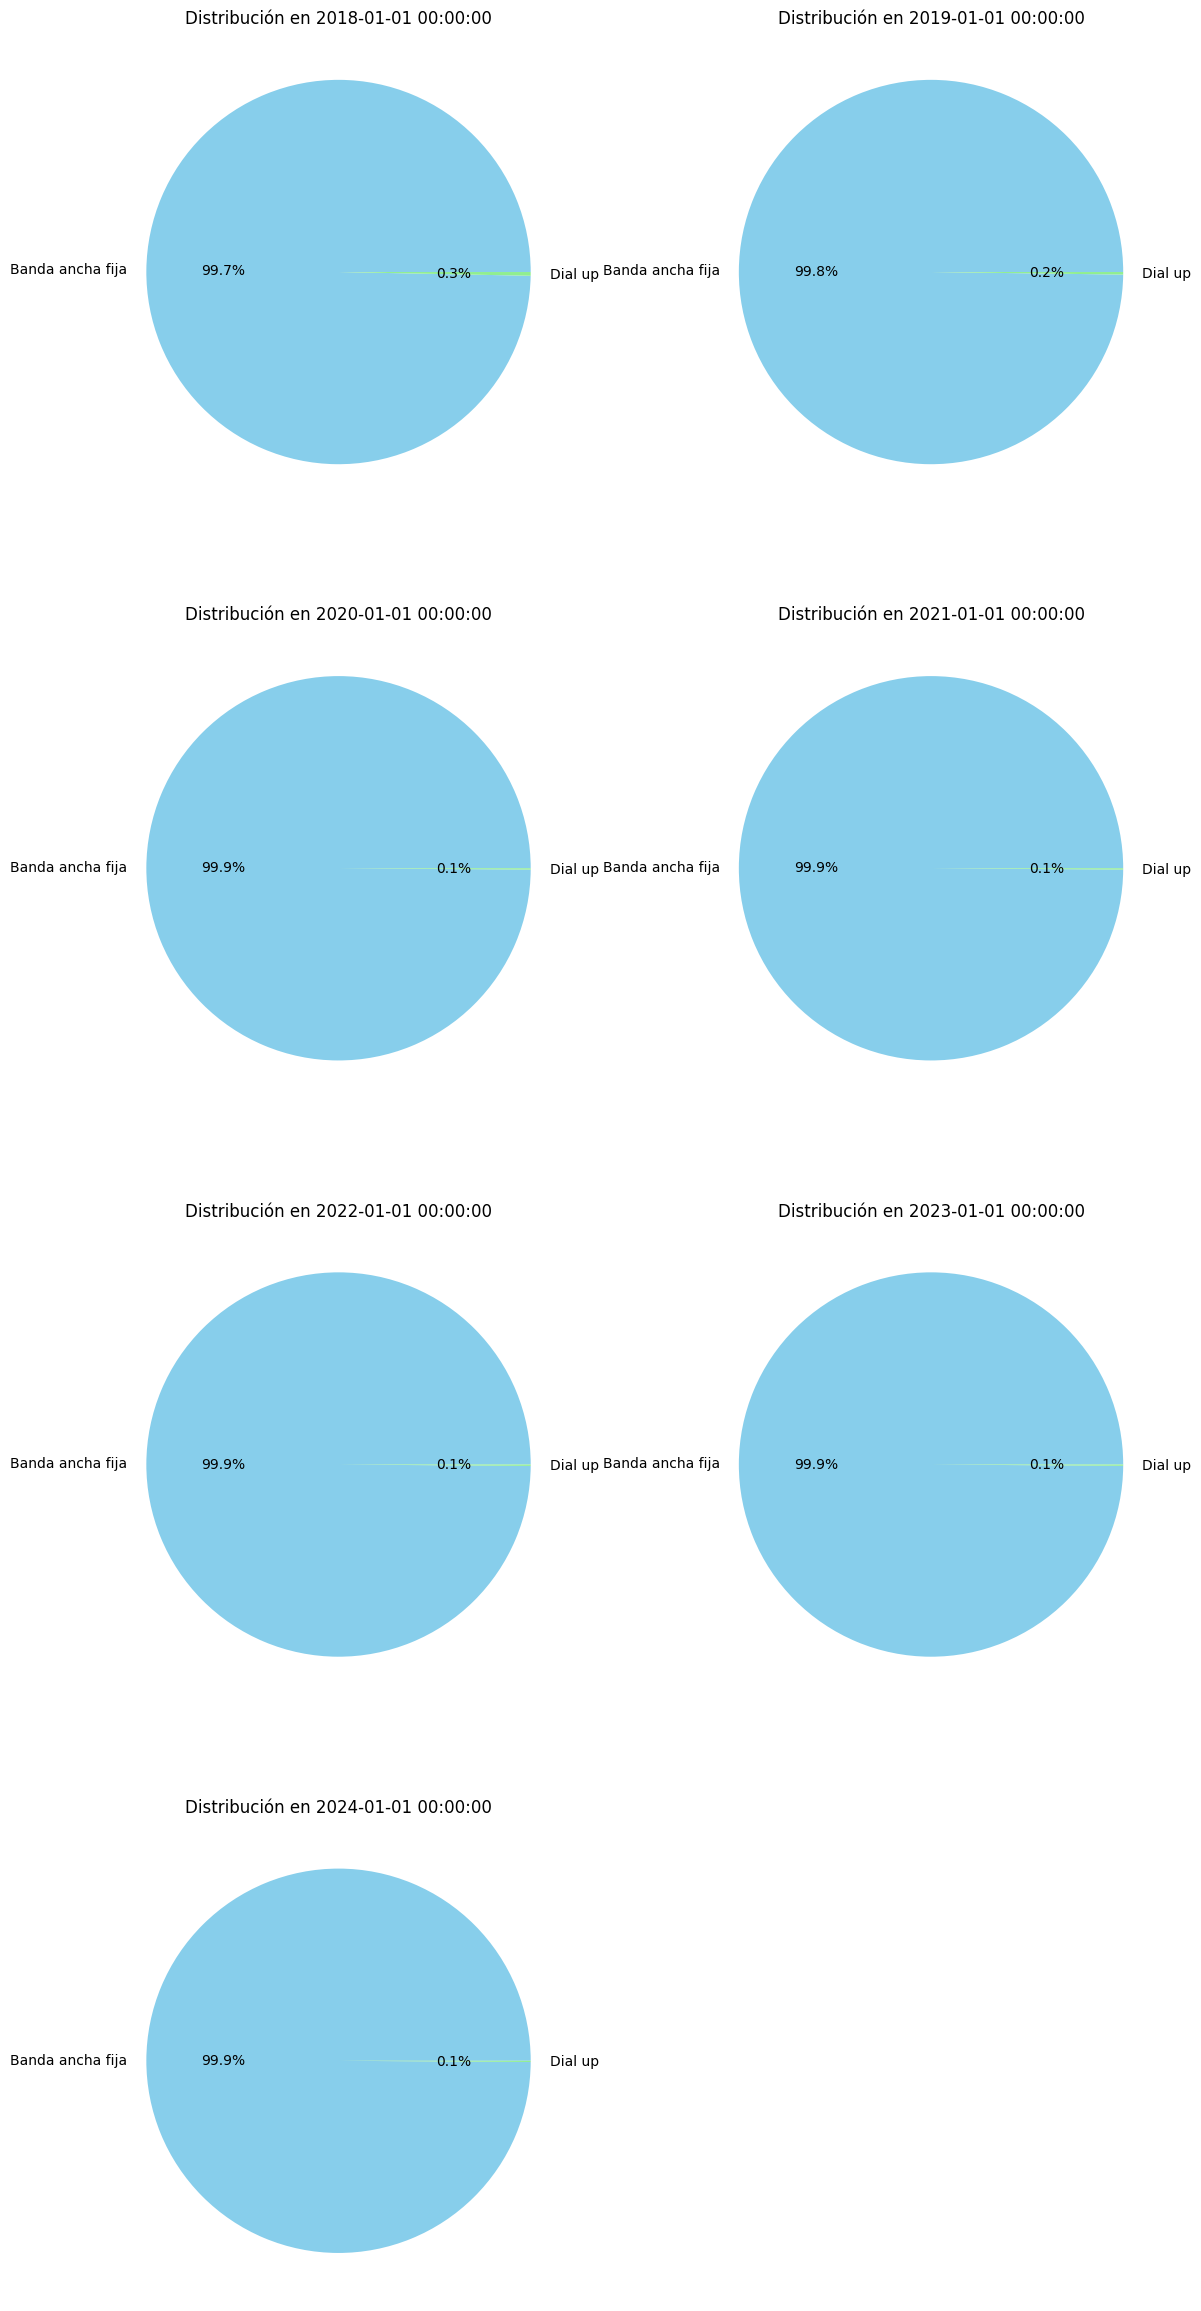

In [70]:
df_torta = df_Totales_Dial_BAf.groupby('Año').sum().reset_index()

# Calcular el número de subtramas necesarias
num_years = df_torta['Año'].nunique()
num_cols = 2
num_rows = math.ceil(num_years / num_cols)

# Crear gráficos de pastel para cada año
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 6))

# Flatten the array of axes for easy iteration if necessary
if num_years > 1:
    axs = axs.flatten()

for i, year in enumerate(df_torta['Año']):
    # Datos para el año actual
    data_year = df_torta[df_torta['Año'] == year]
    totals = [data_year['Banda ancha fija'].values[0], data_year['Dial up'].values[0]]
    
    # Crear el gráfico de pastel
    axs[i].pie(totals, labels=['Banda ancha fija', 'Dial up'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
    axs[i].set_title(f'Distribución en {year}')

# Ocultar subtramas vacías si hay
if num_years < len(axs):
    for j in range(num_years, len(axs)):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()



la proporcion de dial up vs banda ancha no tiene sentido pensarla, se considera que es todo banda ancha.

Para ir a Power BI, prefiero exportar los dataset por separado reduciendo la cantidad de datos para así evitar que me colpase el programa. El criterio para elegir va a ser que, en respuesta a lo observado en el EDA, para poder mostrar que la empresa puede tener una buena oportunidad en Buenos Aires al captar los usuarios de cablemodem, que el resto del país presenta valores muy bajos de velocidad y puede resolverse al tener clientes en actividad y consumo, etc. sòlo necesitaré los datos de los ultimos 5 años y no todos los que tengo en el dataset. En el grafico de consumo a lo largo de los años, es notable que tomando a partir de 2018 podemos captar el comportamiento constante de ascenso de la fibra optica y del cablemodem respecto en Buenos aires VS el resto del pais. 

In [ ]:
#df_Acc_vel_loc_sinrangos 
#df_Velocidad_sin_Rangos 
#df_Accesos_tecnologia_localidad 
#df_Velocidad_por_prov 
#df_Totales_VMD 
#df_Totales_Accesos_Por_Tecnología 
#df_Accesos_Por_Tecnología 
#df_Penetración_poblacion 
#df_Penetracion_hogares 
#df_Penetracion_totales
#df_Totales_Accesos_por_velocidad
#df_Accesos_por_velocidad 
#df_Dial_BAf
#df_Totales_Dial_BAf 
#df_Ingresos

In [17]:
df_Acc_vel_loc_sinrangos.to_csv('AccesoVelocidadsinRango.csv', index=False)


,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2024.0,1.0,Buenos Aires,125147.0,18.0,0.0,0.0,25815.0,169.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024.0,1.0,Capital Federal,0.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024.0,1.0,Catamarca,70.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024.0,1.0,Chaco,3816.0,0.0,0.0,0.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024.0,1.0,Chubut,16640.0,8.0,0.0,0.0,69.0,34.0,836.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df_Velocidad_sin_Rangos['Año'] = pd.to_datetime(df_Velocidad_sin_Rangos['Año'], format='%Y')
df_Velocidad_sin_Rangos = df_Velocidad_sin_Rangos[df_Velocidad_sin_Rangos['Año'] >= '2018']
df_Velocidad_sin_Rangos.to_csv('VelocidadsinRango.csv', index=False)

In [26]:
df_Accesos_tecnologia_localidad.to_csv('AccesoTecnologiaLocalidad.csv', index=False)

In [28]:
df_Velocidad_por_prov['Año'] = pd.to_datetime(df_Velocidad_por_prov['Año'], format='%Y')
df_Velocidad_por_prov = df_Velocidad_por_prov[df_Velocidad_por_prov['Año'] >= '2018']
df_Velocidad_por_prov.to_csv('VelocidadporProvincia.csv', index=False)

In [29]:
df_Totales_VMD['Año'] = pd.to_datetime(df_Totales_VMD['Año'], format='%Y')
df_Totales_VMD = df_Totales_VMD[df_Totales_VMD['Año'] >= '2018']
df_Totales_VMD.to_csv('TotalesVMD.csv', index=False)

In [38]:
df_Totales_Accesos_Por_Tecnología['Año'] = pd.to_datetime(df_Totales_Accesos_Por_Tecnología['Año'], format='%Y')
df_Totales_Accesos_Por_Tecnología = df_Totales_Accesos_Por_Tecnología[df_Totales_Accesos_Por_Tecnología['Año'] >= '2018']
df_Totales_Accesos_Por_Tecnología.to_csv('TotalAccesosporTecnologia.csv', index=False)

In [20]:
df_Accesos_Por_Tecnología['Año'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, '2019 *', 2018, 2017, 2016,
       2015, 2014, nan, '*'], dtype=object)

In [24]:
df_Accesos_Por_Tecnología['Año'] = pd.to_datetime(df_Accesos_Por_Tecnología['Año'], format='%Y')
df_Accesos_Por_Tecnología = df_Accesos_Por_Tecnología[df_Accesos_Por_Tecnología['Año'] >= '2018']
df_Accesos_Por_Tecnología.to_csv('AccesosporTecnologia.csv', index=False)

C:\Users\Agustin\AppData\Local\Temp\ipykernel_840\3830016478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Accesos_Por_Tecnología['Año'] = pd.to_datetime(df_Accesos_Por_Tecnología['Año'], format='%Y')


In [41]:
df_Penetración_poblacion['Año'] = pd.to_datetime(df_Penetración_poblacion['Año'], format='%Y')
df_Penetración_poblacion = df_Penetración_poblacion[df_Penetración_poblacion['Año'] >= '2018']
df_Penetración_poblacion.to_csv('PenetracionPoblacion.csv', index=False)

confirmo que tiene bien los años:

In [45]:
df_Penetracion_hogares.head()
print(df_Penetracion_hogares['Año'].unique())

[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]


In [46]:
df_Penetracion_hogares['Año'] = pd.to_datetime(df_Penetracion_hogares['Año'], format='%Y')
df_Penetracion_hogares = df_Penetracion_hogares[df_Penetracion_hogares['Año'] >= '2018']
df_Penetracion_hogares.to_csv('PenetracionHogares.csv', index=False)

In [48]:
df_Penetracion_totales.head()
print(df_Penetracion_totales['Año'].unique())

[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]


In [49]:
df_Penetracion_totales['Año'] = pd.to_datetime(df_Penetracion_totales['Año'], format='%Y')
df_Penetracion_totales = df_Penetracion_totales[df_Penetracion_totales['Año'] >= '2018']
df_Penetracion_totales.to_csv('PenetracionTotales.csv', index=False)

In [51]:
df_Totales_Accesos_por_velocidad.head()
df_Totales_Accesos_por_velocidad['Año'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014],
      dtype=int64)

In [52]:
df_Totales_Accesos_por_velocidad['Año'] = pd.to_datetime(df_Totales_Accesos_por_velocidad['Año'], format='%Y')
df_Totales_Accesos_por_velocidad = df_Totales_Accesos_por_velocidad[df_Totales_Accesos_por_velocidad['Año'] >= '2018']
df_Totales_Accesos_por_velocidad.to_csv('TotalAccesosporVelocidad.csv', index=False)

In [54]:
df_Accesos_por_velocidad.head()
df_Accesos_por_velocidad['Año'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014],
      dtype=int64)

In [55]:
df_Accesos_por_velocidad['Año'] = pd.to_datetime(df_Accesos_por_velocidad['Año'], format='%Y')
df_Accesos_por_velocidad = df_Accesos_por_velocidad[df_Accesos_por_velocidad['Año'] >= '2018']
df_Accesos_por_velocidad.to_csv('AccesosporVelocidad.csv', index=False)

In [60]:
df_Dial_BAf['Año'].unique()
df_Dial_BAf['Año'] = pd.to_datetime(df_Dial_BAf['Año'], format='%Y')
df_Dial_BAf = df_Dial_BAf[df_Dial_BAf['Año'] >= '2018']
df_Dial_BAf.to_csv('DailUpyBandaAncha.csv', index=False)

In [61]:
df_Totales_Dial_BAf['Año'].unique()
df_Totales_Dial_BAf['Año'] = pd.to_datetime(df_Totales_Dial_BAf['Año'], format='%Y')
df_Totales_Dial_BAf = df_Totales_Dial_BAf[df_Totales_Dial_BAf['Año'] >= '2018']
df_Totales_Dial_BAf.to_csv('TotalDialyBandaAncha.csv', index=False)

In [65]:
df_Ingresos['Año'].unique()
df_Ingresos['Año'] = pd.to_datetime(df_Ingresos['Año'], format='%Y')
df_Ingresos = df_Ingresos[df_Ingresos['Año'] >= '2018']
df_Ingresos.to_csv('Ingresos.csv', index=False)